# **ML Group 162: Thyroid Dataset Cleaning**

# Preliminaries

In [11]:
! pip install pandas
! pip install matplotlib.pyplot
! pip install numpy
! pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "thyroidDF.csv"
df_original = pd.read_csv(file_path)
df = pd.read_csv(file_path)

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


# Missing Values

### Identifying Missing Values

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Display missing values in descending order
missing_summary = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})
print(missing_summary[missing_summary["Missing Values"] > 0])

     Missing Values  Percentage
sex             307    3.347143
TSH             842    9.180113
T3             2604   28.390754
TT4             442    4.819014
T4U             809    8.820323
FTI             802    8.744003
TBG            8823   96.194941


### Handling Missing Values

In [13]:
#Drop features with too many missing values
if "TBG" in df.columns:
    df = df.drop(columns=["TBG"])  

#Impute missing  values in numerical columns Using median or mean imputation for continuous variables:
# df["T3"] = df["T3"].fillna(df["T3"].median()) 
# df["TT4"] = df["TT4"].fillna(df["TT4"].mean())

#To decrease the missing values for sex, check if pregnancy is true, and assign these instances female.
df.loc[df["pregnant"] == "t", "sex"] = "F"

#Fill missing categorical values with "Unknown" or mode (most frequent value):
df["on_thyroxine"] = df["on_thyroxine"].fillna("Unknown")


### Percentage of missing values after handling them

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Display missing values in descending order
missing_summary = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})
print(missing_summary[missing_summary["Missing Values"] > 0])

     Missing Values  Percentage
sex             303    3.303532
TSH             842    9.180113
T3             2604   28.390754
TT4             442    4.819014
T4U             809    8.820323
FTI             802    8.744003


# Outliers

### Identifying Outliers 


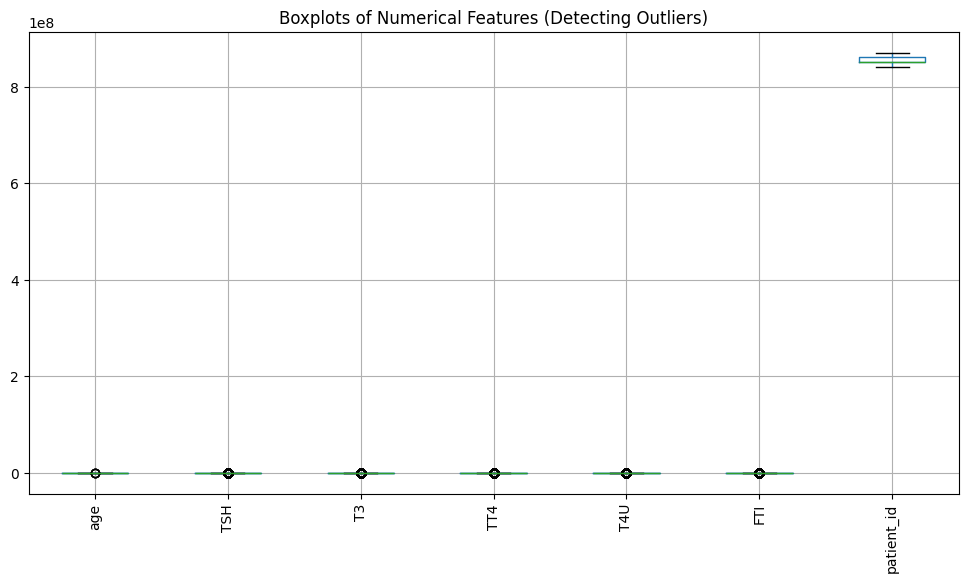

In [15]:
# Select numerical columns
numerical_features = df.select_dtypes(include=['number']).columns

# Plot boxplots to detect outliers
plt.figure(figsize=(12, 6))
df[numerical_features].boxplot(rot=90)  # Rotate labels for readability
plt.title("Boxplots of Numerical Features (Detecting Outliers)")
plt.show()


### Handling Outliers 

Best Practice: If the dataset is large, removal is fine. If small, capping is preferred to avoid losing too much data.

In [16]:
# Drop the patient_id column since it's not useful for feature learning
df.drop(columns=['patient_id'], inplace=True)

# Select numerical features for outlier detection (after dropping 'patient_id')
numerical_features = df.select_dtypes(include=['number']).columns

# Calculate IQR
Q1 = df[numerical_features].quantile(0.25)  # 25th percentile
Q3 = df[numerical_features].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)

# Filter the DataFrame to show only rows that have at least one outlier
outlier_rows = df[outliers.any(axis=1)]

# Display the first few outlier rows
print(outlier_rows.head())

# Save the outlier rows to a CSV for manual inspection
outlier_rows.to_csv("outlier_rows.csv", index=False)

print("Outlier rows saved as 'outlier_rows.csv'.")

# Count number of outliers per column
outliers.sum()

df_cleaned = df.copy()

numerical_features = df_cleaned.select_dtypes(include=['number']).columns

    age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
18   63   F            t                  f                   f    t        f   
31   85   M            f                  f                   f    f        f   
32   41   M            f                  f                   f    f        f   
33   71   F            t                  f                   f    f        f   
36   51   F            f                  f                   f    f        f   

   thyroid_surgery I131_treatment query_hypothyroid  ...   T3 TT4_measured  \
18               f              f                 f  ...  NaN            t   
31               f              f                 f  ...  0.1            t   
32               f              f                 f  ...  1.6            t   
33               f              f                 f  ...  NaN            t   
36               f              f                 f  ...  2.1            t   

      TT4 T4U_measured   T4U FTI_measured   

# Verifying Changes

Original dataset size: (9172, 31)
Cleaned dataset size: (9172, 29)


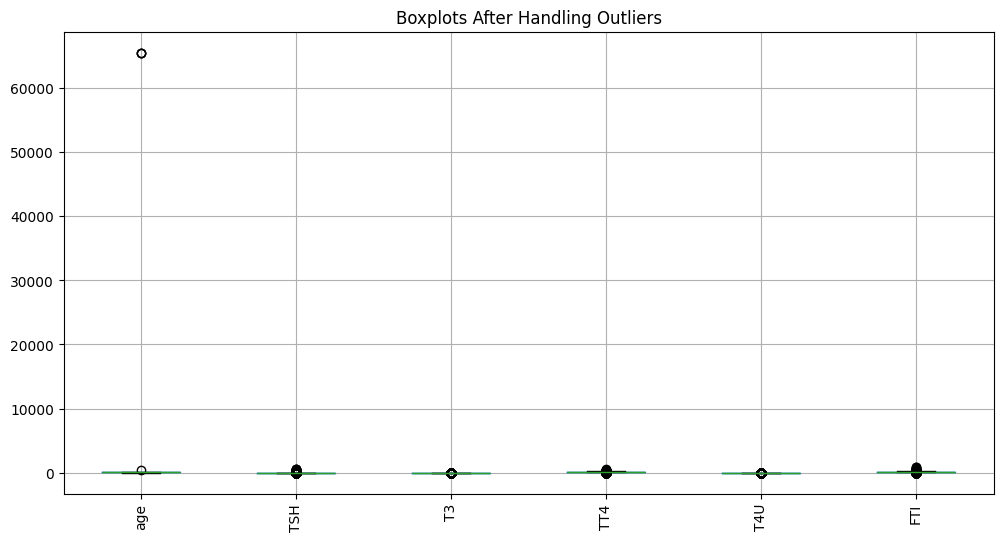

In [17]:
print("Original dataset size:", df_original.shape)
print("Cleaned dataset size:", df_cleaned.shape)

# Plot new boxplots after removing outliers
plt.figure(figsize=(12, 6))
df_cleaned[numerical_features].boxplot(rot=90)
plt.title("Boxplots After Handling Outliers")
plt.show()


# Saving Changes

In [18]:
df_cleaned.to_csv("thyroid_cleaned.csv", index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!
